In [2]:
#importing Libraries
import pandas as pd
import numpy as np

# For all NLP related operations on text
import re #Regular Expression
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignoring all the warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Load the DataSet
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
# Read DataSet
tweet = pd.read_csv('Elon_musk.csv', encoding='latin1')

In [4]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
tweet = tweet.rename(columns= {'Text': 'Tweet'}, inplace= False)
tweet.head()

,Unnamed: 0,Tweet
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Tweet       1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
tweet.isnull().sum()

Unnamed: 0    0
Tweet         0
dtype: int64

**Removing Punctuations, Numbers and Special characters**

This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words

In [8]:
# Cleaning the text by removing irrelevant information
import re # Regular Expression
import string

def clean_text(text):
  '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers. '''
  text = text.lower()
  text = re.sub('\[.*?\]', '',text)
  text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '',text)
  text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[‘’“”...]', '', text)
  return text

clean = lambda x: clean_text(x)

# Clean The Text
tweet["Tweet"] = tweet["Tweet"].apply(clean_text)
tweet.head()

,Unnamed: 0,Tweet
0,1,im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,doge is underestimated
4,5,teslacn congratulations tesla china for amazin...


In [13]:
# Word Frequency
freq = pd.Series(' '.join(tweet['Tweet']).split()).value_counts()[:20] # for Top
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [14]:
# Removing stopwords

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
tweet['Tweet'] = tweet['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Word frequency after removal of stopwords

freq_Sw = pd.Series(' '.join(tweet['Tweet']).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

In [19]:
# Count vectoriser tells the frequency of a word

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweet["Tweet"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
# Print(word_freq_df.sort('occurrences',ascending = False).head())

In [20]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
5,absence,1,0.000075
6,absolute,1,0.000075
7,absolutely,15,0.001121
8,absorb,1,0.000075
9,absorption,1,0.000075


We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. Bag of words (Simple vectorization)
2. TF-IDF (Term Frequency - Inverse Document Frequency)

In [21]:
# TFIDF - Term frequency inverse Document Frequencyt

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweet["Tweet"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


N - Gram


N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.



> Bi - Gram



In [22]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  # For tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [23]:
top2_words = get_top_n2_words(tweet["Tweet"], n=200) # Top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


Bi-Gram Plot

[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

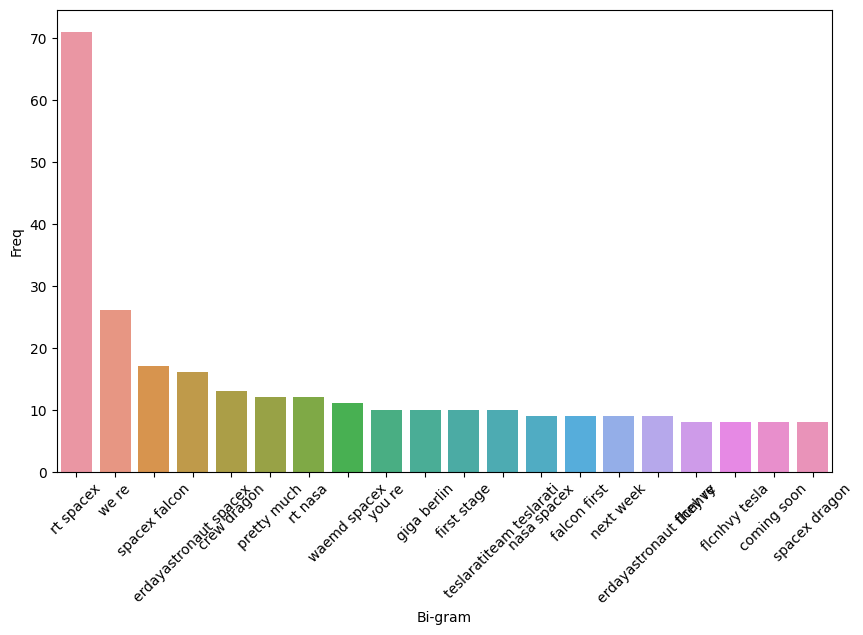

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 6))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

Tri-Gram

In [25]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [26]:
top3_words = get_top_n3_words(tweet["Tweet"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


**Tri-Gram Plot**

[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

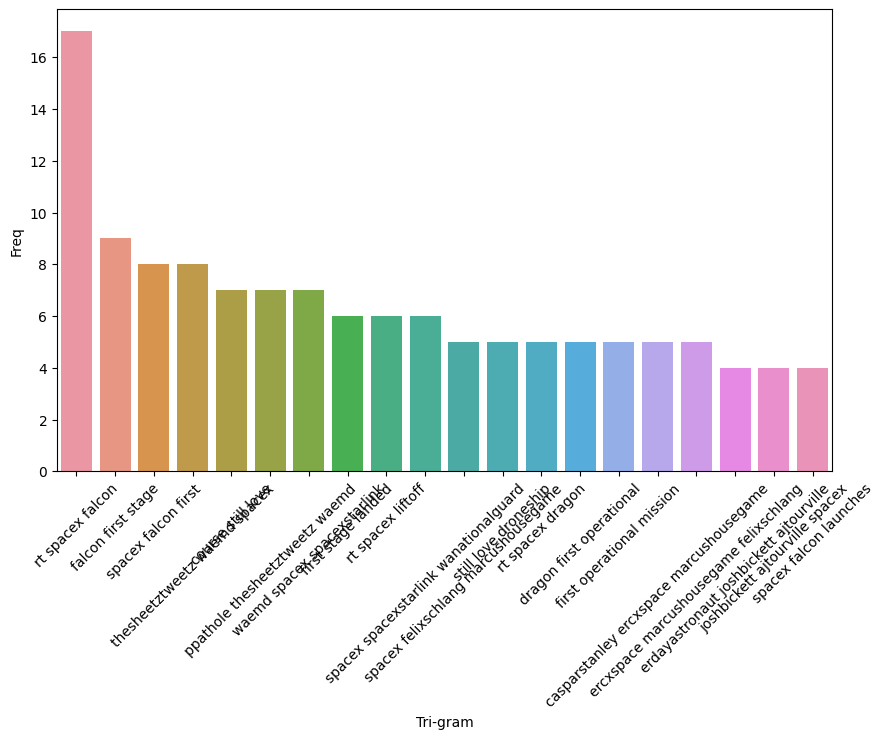

In [27]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 6))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

**WordCloud**

In [28]:
string_Total = " ".join(tweet["Tweet"])

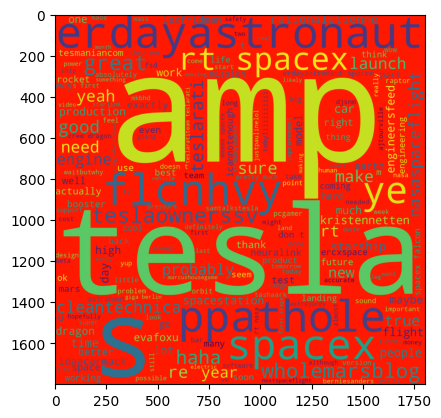

In [31]:
# Wordcloud for entire corpus
from wordcloud import WordCloud

# Generate Word Cloud

# STOPWORDS.add('pron')
# STOPWORDS.add('rt')
# STOPWORDS.add('yeah')
wordcloud_stw = WordCloud(
                background_color= '#ff1900',
                width = 1800,
                height = 1800
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

**Subjectivity and Polarity**

In [32]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweet[["subjectivity", "polarity"]] = tweet.apply(sentiment_analysis, axis=1)

tweet

,Unnamed: 0,Tweet,subjectivity,polarity
0,1,im alien,0.750000,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,3,joerogan spotify great interview,0.750000,0.800000
3,4,doge underestimated,0.000000,0.000000
4,5,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
...,...,...,...,...
1994,1995,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111
1995,1996,ppathole make sure read ur terms amp condition...,0.888889,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,1998,ppathole altho dumb dumber,0.500000,-0.375000


**Creating a WorldCloud**

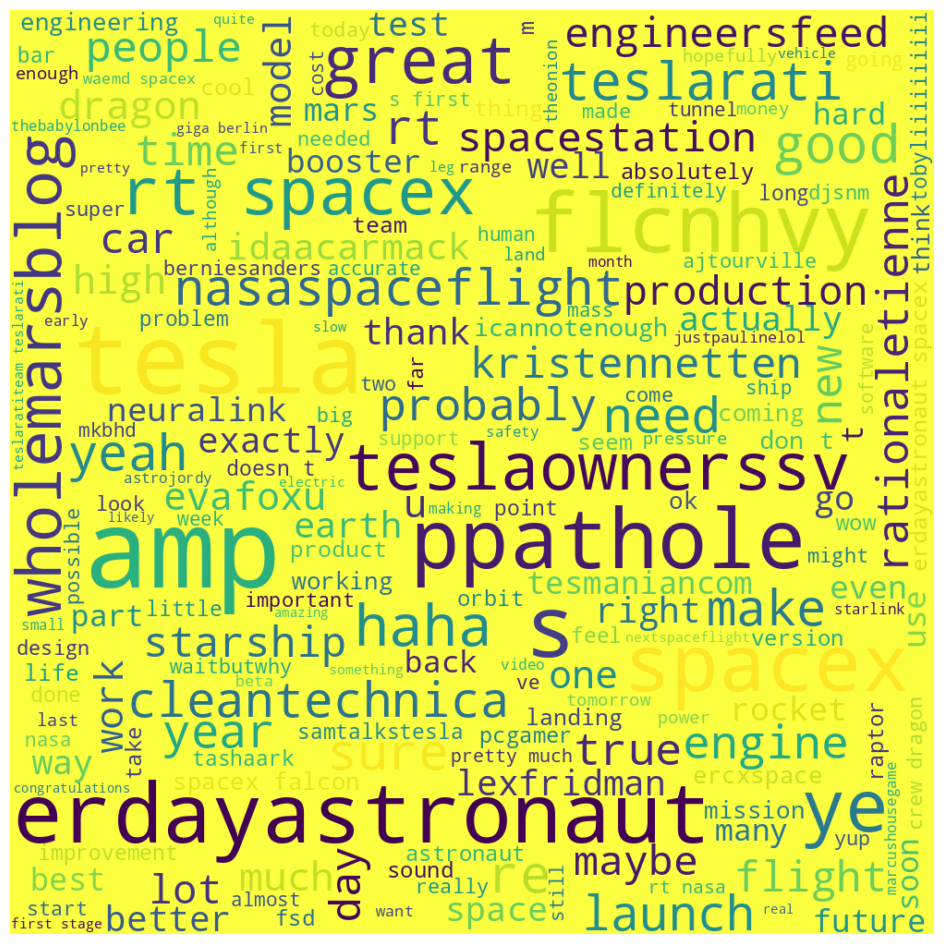

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate Word Cloud

#STOPWORDS.add('pron')
#STOPWORDS.add('rt')
allwords = " ".join([twts for twts in tweet["Tweet"]])
wordCloud = WordCloud(width = 1000, background_color= '#fcff40', height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(12,12), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [35]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
tweet["analysis"] = tweet["polarity"].apply(analysis)

tweet

,Unnamed: 0,Tweet,subjectivity,polarity,analysis
0,1,im alien,0.750000,-0.250000,Negative
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,3,joerogan spotify great interview,0.750000,0.800000,Positive
3,4,doge underestimated,0.000000,0.000000,Neutral
4,5,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive
...,...,...,...,...,...
1994,1995,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive
1995,1996,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive
1996,1997,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral
1997,1998,ppathole altho dumb dumber,0.500000,-0.375000,Negative


In [36]:
# Create a Positive Tweets and Negativeb Tweets
positive_tweets = tweet[tweet['analysis'] == 'Positive']
negative_tweets = tweet[tweet['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


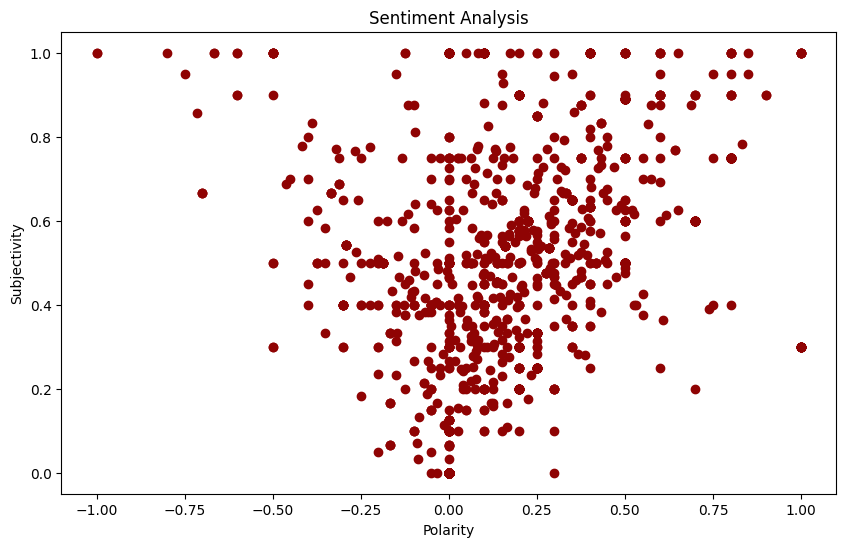

In [37]:
plt.figure(figsize=(10, 6))

for i in range(0, tweet.shape[0]):
    plt.scatter(tweet["polarity"][i], tweet["subjectivity"][i], color = "#8f0303")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [38]:
len(positive_tweets) / len(negative_tweets)

4.21608040201005

**Conclusion:**

Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.